In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from code_training.data_utils import (

    get_dev_db_params,
    get_table_from_database,
)

import os
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")

In [3]:
parameters_file = os.path.join("parameters.yaml")
config_file = os.path.join("config.yaml")
config_secrets_file = os.path.join("config_secret.yaml")

Read in the data

In [4]:
with open(parameters_file) as fp:
        parameters = yaml.safe_load(fp)
db_params = get_dev_db_params(
    config_file,
    config_secrets_file,
)

df = get_table_from_database(**db_params, table="ratings")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66658 entries, 0 to 66657
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      66658 non-null  int64  
 1   userId     66658 non-null  int64  
 2   movieId    66658 non-null  int64  
 3   rating     66658 non-null  float64
 4   timestamp  66658 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.5 MB


<Axes: xlabel='rating', ylabel='Count'>

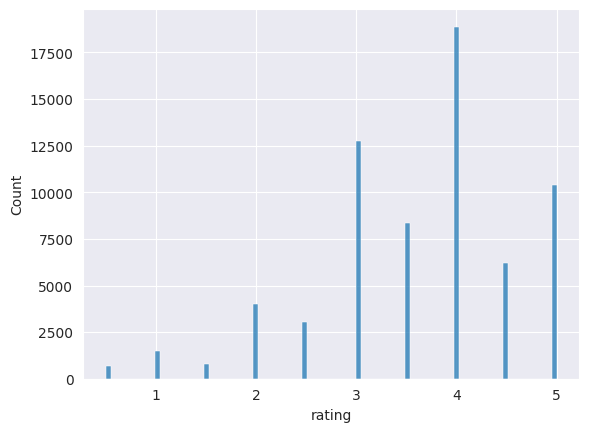

In [6]:
sns.histplot(df, x="rating")

I'd like to see, the distribution of ratings as a function of the mean rating. I'll calculate the mean rating per movie and then merge the mean rating onto the original data

In [16]:
df_movie_grp = df.groupby("movieId").agg({"rating": "mean"}).rename(columns={"rating": "mean_rating_for_movie"}).reset_index()

In [17]:
df_with_means = pd.merge(df, df_movie_grp[["movieId", "mean_rating_for_movie"]])
df_with_means.head()

,index,userId,movieId,rating,timestamp,mean_rating_for_movie
0,0,1,1,4.0,964982703,3.920930
1,1,1,3,4.0,964981247,3.259615
2,2,1,6,4.0,964982224,3.946078
3,3,1,47,5.0,964983815,3.975369
4,4,1,50,5.0,964982931,4.237745


<Axes: xlabel='mean_rating_for_movie', ylabel='Count'>

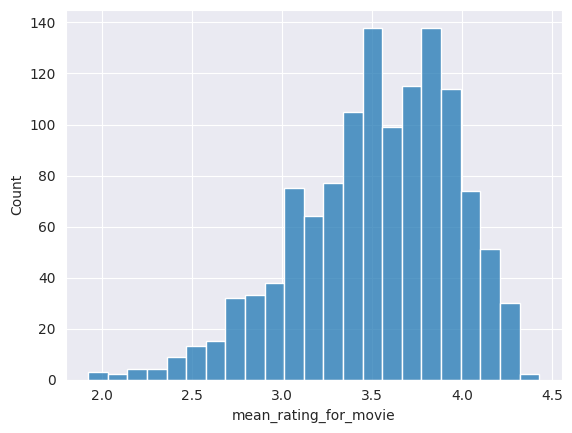

In [18]:
sns.histplot(df_movie_grp, x="mean_rating_for_movie")

Let's round the mean rating so we can see what the distribution of ratings are for each rounded rating of [2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [20]:
df_with_means["rounded_mean_rating"] = df_with_means["mean_rating_for_movie"].map(lambda x: round(round(2*x)/2, 1))

The distributions look as expected. No matter what the mean rating for a movie, there were always some .5 star ratings and 5 star ratings. This is likely going to be the source of errors, as a machine learning algorithm is going to pick up on the ratings being overall high or low, and likely place heavy emphasis on that when predicting what a user will rate the movie.

mean rounded rating: 2.0


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
90,106,1,1644,3.0,964983536,2.109375,2.0
498,738,6,374,3.0,845554296,2.200000,2.0
528,798,6,546,2.0,845554349,2.000000,2.0
612,923,7,2701,1.5,1106713076,2.207547,2.0
882,1316,11,1882,2.0,901200143,1.954545,2.0


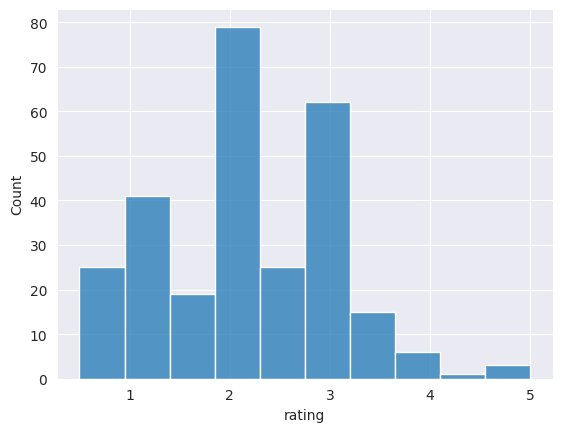

mean rounded rating: 2.5


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
37,39,1,673,3.0,964981775,2.707547,2.5
165,209,1,3273,5.0,964983536,2.672414,2.5
224,299,3,72378,0.5,1306464164,2.619048,2.5
411,573,6,19,2.0,845553382,2.727273,2.5
425,594,6,65,3.0,845555070,2.532258,2.5


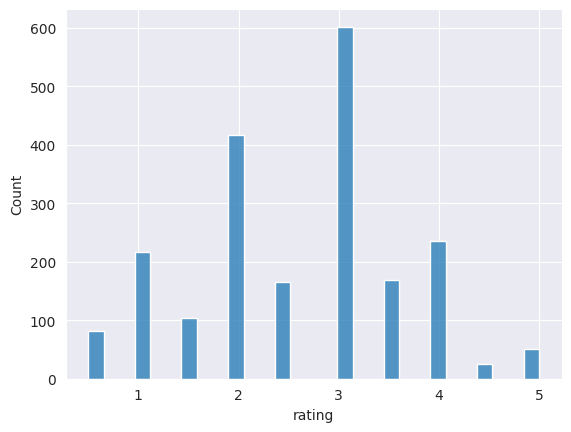

mean rounded rating: 3.0


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
12,13,1,231,5.0,964981179,3.060150,3.0
21,22,1,367,4.0,964981710,3.184713,3.0
54,64,1,1092,5.0,964983484,3.191489,3.0
79,92,1,1377,3.0,964982653,3.025000,3.0
84,99,1,1552,4.0,964982620,3.033898,3.0


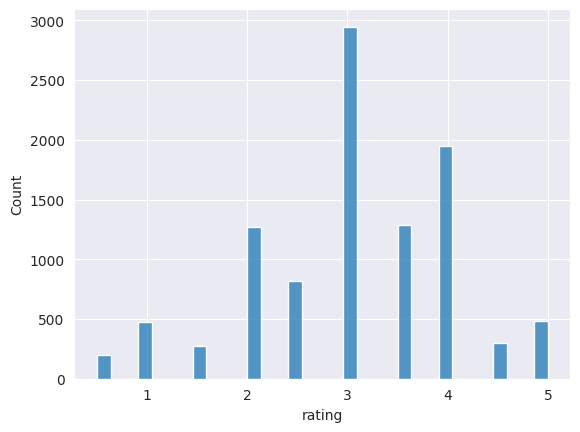

mean rounded rating: 3.5


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
1,1,1,3,4.0,964981247,3.259615,3.5
5,5,1,70,3.0,964982400,3.509091,3.5
8,8,1,151,5.0,964984041,3.545455,3.5
9,10,1,163,5.0,964983650,3.560606,3.5
10,11,1,216,5.0,964981208,3.326531,3.5


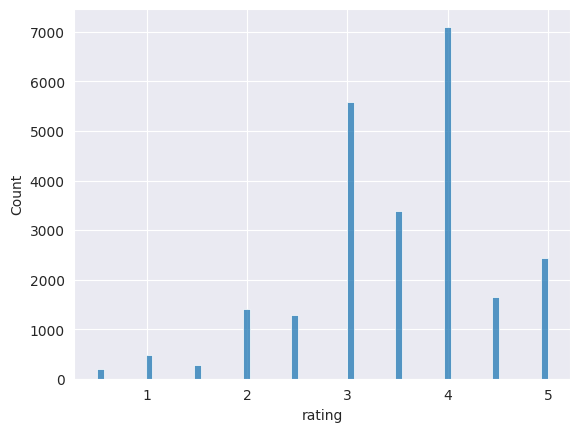

mean rounded rating: 4.0


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
0,0,1,1,4.0,964982703,3.920930,4.0
2,2,1,6,4.0,964982224,3.946078,4.0
3,3,1,47,5.0,964983815,3.975369,4.0
4,4,1,50,5.0,964982931,4.237745,4.0
6,6,1,101,5.0,964980868,3.782609,4.0


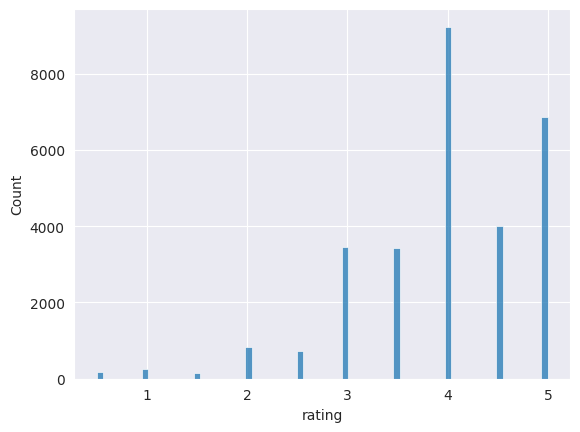

mean rounded rating: 4.5


,index,userId,movieId,rating,timestamp,mean_rating_for_movie,rounded_mean_rating
151,192,1,2959,5.0,964983282,4.272936,4.5
180,232,2,318,3.0,1445714835,4.429022,4.5
187,239,2,48516,4.0,1445715064,4.252336,4.5
244,332,4,475,5.0,945174290,4.300000,4.5
254,348,4,898,5.0,964623347,4.310345,4.5


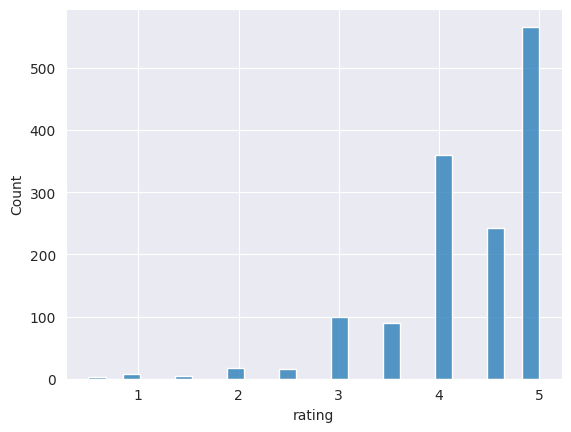

In [21]:
rounded_ratings = [rating for rating in sorted(df_with_means["rounded_mean_rating"].unique())]
for mean_rounded_rating in rounded_ratings:
    df_this_rating = df_with_means[np.isclose(df_with_means["rounded_mean_rating"], mean_rounded_rating)]
    print(f"mean rounded rating: {mean_rounded_rating}")
    sns.histplot(df_this_rating, x="rating")
    display(df_this_rating.head())
    plt.show()